# Decision Tree Classification
CART - Classification and Regression Trees

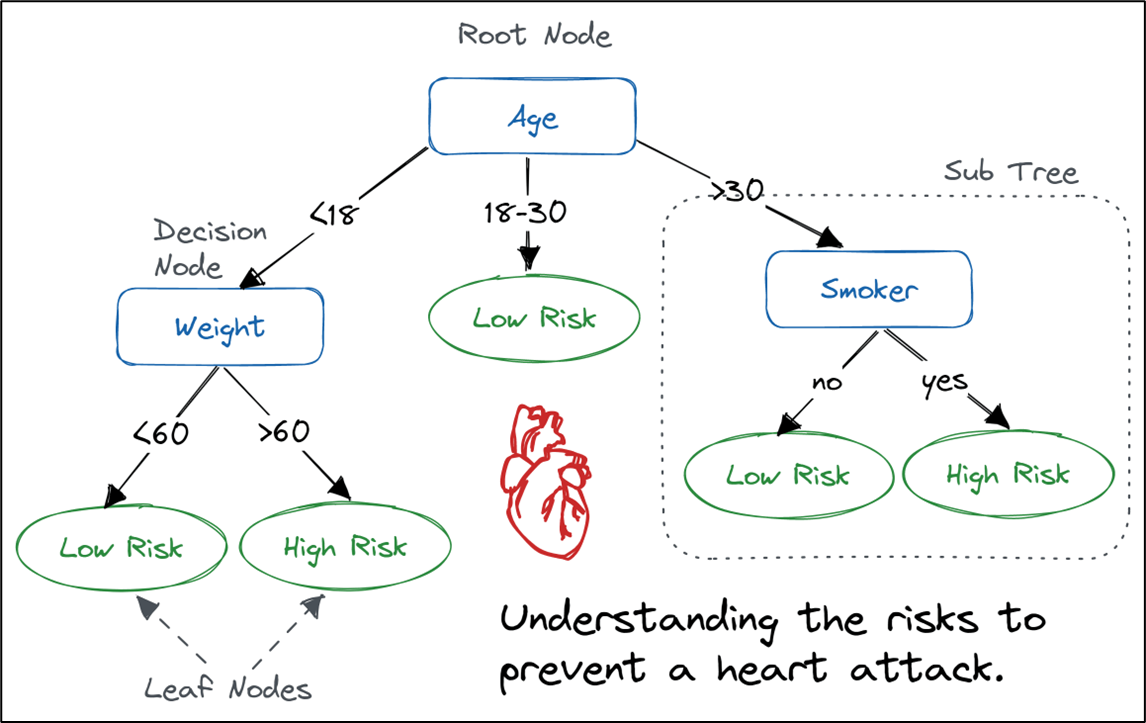

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Target Feature - Species

# Step 2 - Perform Basic Data quality checks

In [3]:
df.shape

(150, 5)

In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(149, 5)

In [7]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

# Step 3 - Seperate X and Y(species)

In [8]:
X = df.drop(columns=["species"])
Y = df["species"]

In [9]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [11]:
Y.value_counts()

species
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

<Axes: xlabel='species'>

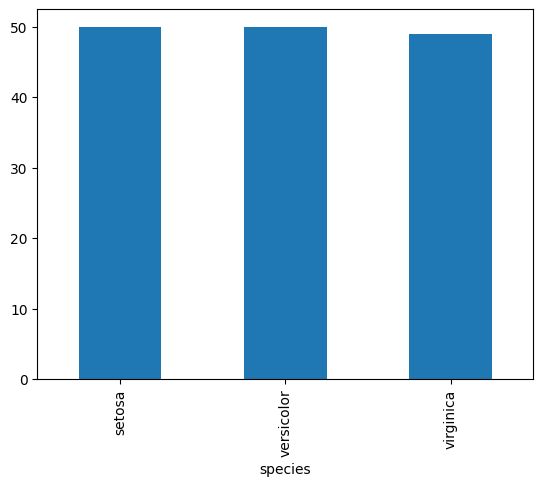

In [12]:
Y.value_counts().plot(kind="bar")

# Step 5 - Apply Train Test split

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

In [14]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
104,6.5,3.0,5.8,2.2
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
141,6.9,3.1,5.1,2.3


In [15]:
ytrain.head()

95     versicolor
104     virginica
66     versicolor
0          setosa
141     virginica
Name: species, dtype: object

In [16]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
117,7.7,3.8,6.7,2.2
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [17]:
ytest.head()

73     versicolor
18         setosa
117     virginica
78     versicolor
76     versicolor
Name: species, dtype: object

In [18]:
xtrain.shape

(99, 4)

In [19]:
xtest.shape

(50, 4)

# Step 6 - Apply preprocessing

In [20]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
).set_output(transform="pandas")

In [23]:
num_pipe.fit(xtrain)

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [24]:
xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
95,-0.123796,0.017101,0.241765,-3.037022e-16
104,0.856669,0.017101,1.175802,1.367753e+00
66,-0.246354,0.017101,0.416897,4.103259e-01
0,-0.859145,1.226369,-1.392801,-1.367753e+00
141,1.346902,0.258954,0.767161,1.504528e+00


In [25]:
xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.366437,-0.466606,0.533652,-3.037022e-16
18,-0.123796,1.951930,-1.217669,-1.230978e+00
117,2.327367,1.951930,1.701199,1.367753e+00
78,0.243878,-0.224753,0.416897,4.103259e-01
76,1.224344,-0.466606,0.592029,2.735506e-01


# Step 7 - Build the model

In [26]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="gini",
    random_state=42,
)
model1.fit(xtrain_pre, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
model1.score(xtrain_pre, ytrain)

0.6666666666666666

In [28]:
model1.score(xtest_pre, ytest)

0.68

# Hyperparameter tuning

In [32]:
params = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_split": [5, 6, 7, 8],
    "min_samples_leaf": [5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
}

In [37]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=42)
gscv = GridSearchCV(dtc, params, cv=5, scoring="f1_macro")
gscv.fit(xtrain_pre, ytrain)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [38]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [39]:
gscv.best_score_

np.float64(0.9003455803455804)

In [40]:
best_dtc = gscv.best_estimator_
best_dtc

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Evaluate the best model in detail

In [41]:
best_dtc.score(xtrain_pre, ytrain)

0.9393939393939394

In [42]:
best_dtc.score(xtest_pre, ytest)

1.0

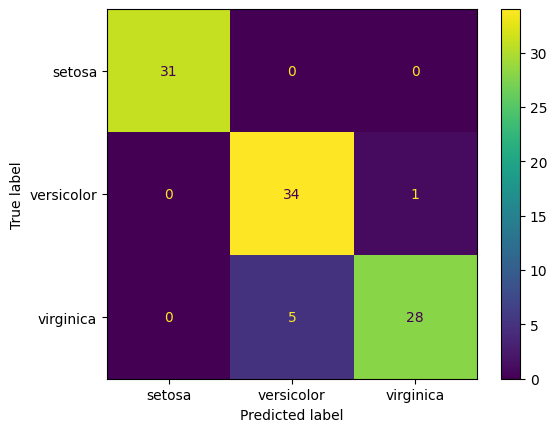

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtc, xtrain_pre, ytrain)

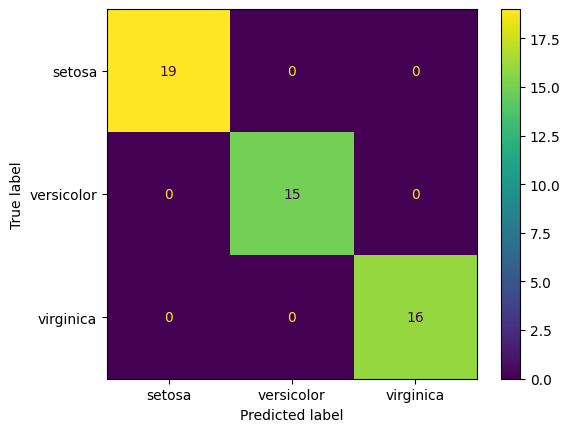

In [45]:
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest_pre, ytest)

In [46]:
ypred_test = best_dtc.predict(xtest_pre)
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [47]:
ytest.head()

73     versicolor
18         setosa
117     virginica
78     versicolor
76     versicolor
Name: species, dtype: object

In [48]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Step 8 - Out of sample prediction

In [49]:
xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [51]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [53]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.368912,-1.192167,0.125010,0.136775
1,1.346902,0.258954,0.767161,1.504528
2,-0.859145,-1.192167,-0.458763,-0.136775
3,-1.717052,-0.224753,0.241765,-1.367753
4,0.121320,0.017101,0.767161,0.820652
5,-0.368912,1.226369,-1.451178,-1.367753
6,-0.246354,0.017101,-0.108499,0.136775
7,0.856669,0.017101,0.825538,1.094202
8,-0.614029,1.710076,-1.334424,-1.367753
9,-0.859145,0.984515,-1.334424,0.136775


In [54]:
preds = best_dtc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [55]:
probs = best_dtc.predict_proba(xnew_pre)
probs

array([[0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.5, 0.5],
       [0. , 0.5, 0.5]])

In [56]:
best_dtc.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [57]:
xnew["species"] = preds
xnew[best_dtc.classes_] = probs.round(2)

In [58]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,1.0,0.0
1,6.9,3.1,5.1,2.3,virginica,0.0,0.0,1.0
2,5.1,2.5,3.0,1.1,versicolor,0.0,1.0,0.0
3,4.4,2.9,NaN,0.2,versicolor,0.0,1.0,0.0
4,5.9,3.0,5.1,1.8,virginica,0.0,0.2,0.8
5,5.5,3.5,1.3,0.2,setosa,1.0,0.0,0.0
6,5.6,NaN,3.6,1.3,versicolor,0.0,1.0,0.0
7,6.5,3.0,5.2,2.0,virginica,0.0,0.0,1.0
8,5.3,3.7,1.5,0.2,setosa,1.0,0.0,0.0
9,5.1,3.4,1.5,NaN,setosa,1.0,0.0,0.0


In [60]:
xnew.to_csv("results.csv", index=False)

In [61]:
xnew["species"].value_counts()

species
versicolor    8
virginica     4
setosa        3
Name: count, dtype: int64

<Axes: xlabel='species'>

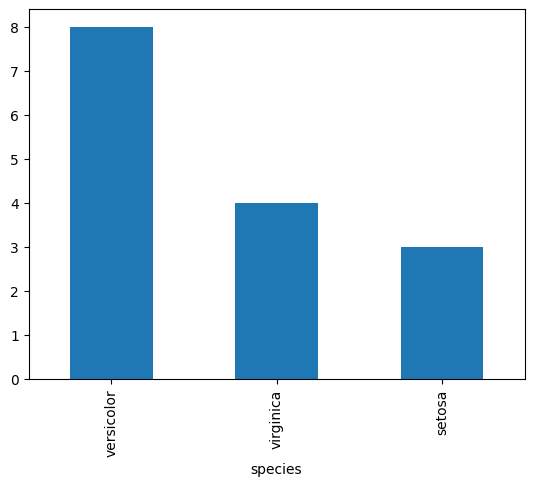

In [62]:
xnew["species"].value_counts().plot(kind="bar")

# Plotting Decision tree and Feature importance

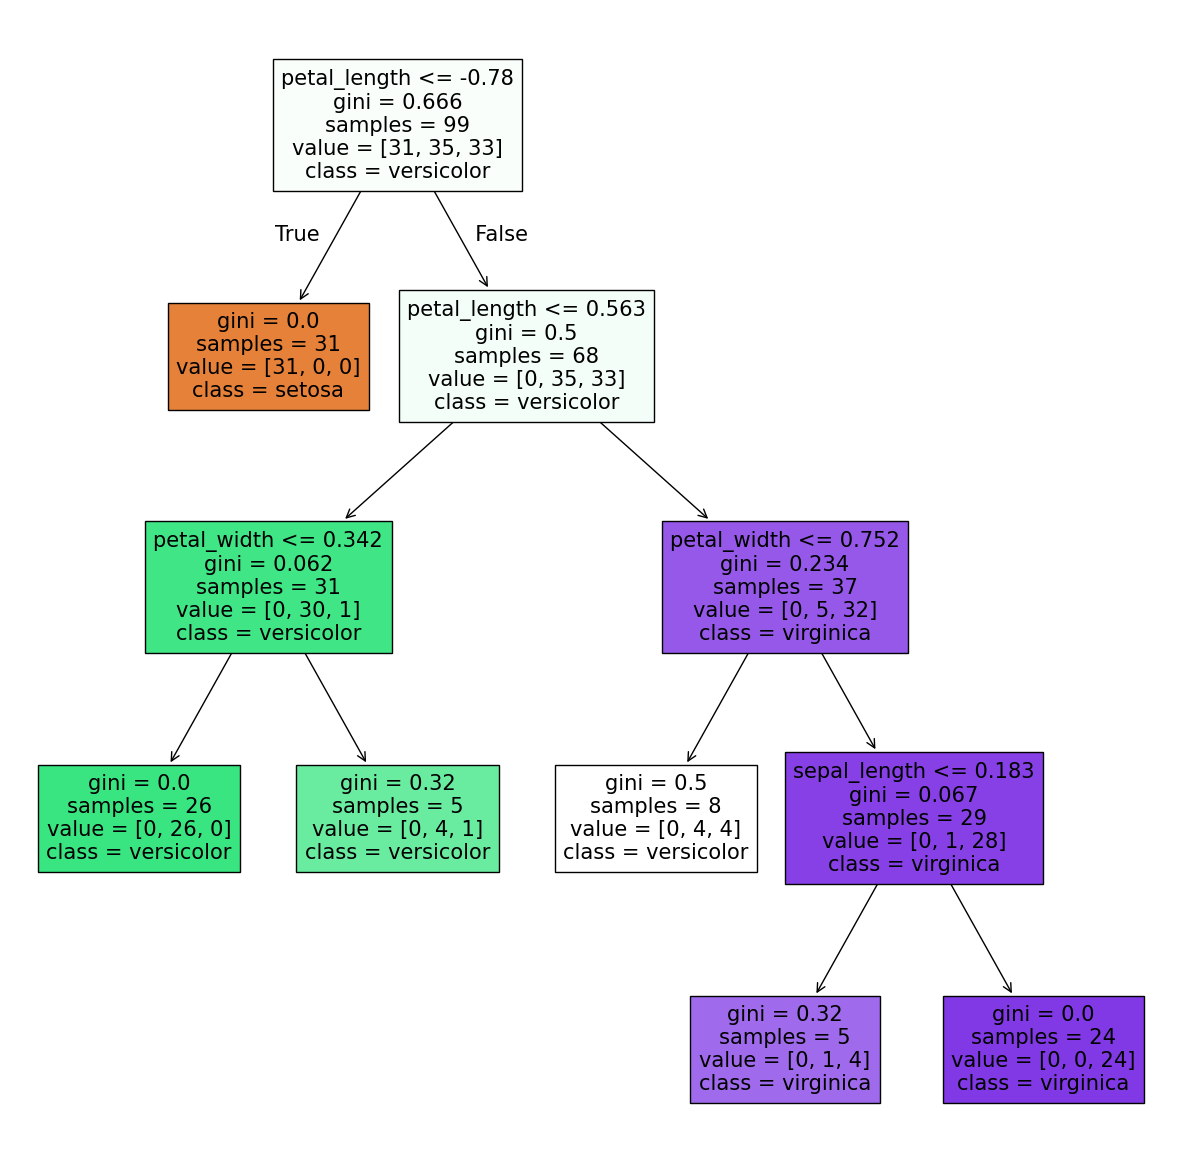

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plot_tree(
    best_dtc, feature_names=xtrain.columns, class_names=best_dtc.classes_, filled=True
)
plt.show()

In [69]:
best_dtc.feature_importances_

array([0.00563759, 0.        , 0.94236752, 0.05199489])

In [70]:
xtrain.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [71]:
imp = pd.Series(best_dtc.feature_importances_, index=xtrain.columns)
imp

sepal_length    0.005638
sepal_width     0.000000
petal_length    0.942368
petal_width     0.051995
dtype: float64

In [72]:
imp.sort_values(ascending=False)

petal_length    0.942368
petal_width     0.051995
sepal_length    0.005638
sepal_width     0.000000
dtype: float64

<Axes: >

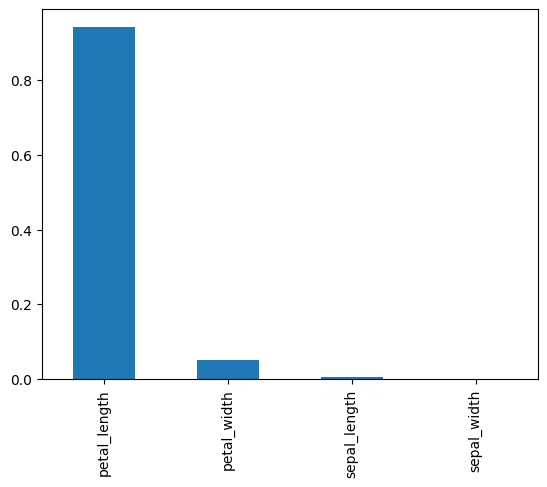

In [73]:
imp.sort_values(ascending=False).plot(kind="bar")

# Step 9 - Save the pre and model

In [74]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [76]:
joblib.dump(best_dtc, "iris_model.joblib")

['iris_model.joblib']

# Loading model objects and pre

In [77]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [78]:
m = joblib.load("iris_model.joblib")

In [79]:
m

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None
